Name: Khush Kalavadia

# Data Science & Business Analytics Task
### **\#3 Performing ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’**

**Objective**: To find out the weak areas where we can work to make more profit and business problems that can be solved by exploring the data?

**Dataset**: It provides us the data related to the products that are purchased from the Super store. 

# Importing libraries 

In [26]:
#Importing all the dependences
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

In [3]:
#Mounting the Google Drive to get the dataset
drive.mount('/content/drive')

Mounted at /content/drive


# Understanding the dataset

In [4]:
#Understanding the dataset
db = pd.read_csv('/content/drive/MyDrive/ML_Dataset/SampleSuperstore.csv')
db.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
db.shape  #rows and columns of the dataset

(9994, 13)

In [6]:
db.info() # print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
db.isnull().sum() # Checks the missing values.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Total there are 9994 rows and the data in none of the column is null. 

# Removing any redundant data

In [8]:
db.duplicated().sum() # checks for duplicate data along the rows

17

We have 17 rows out of 9994 which are having duplicate data. Hence, we will drop the same. 

In [9]:
db.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
db.nunique() # gives the unique data in each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

We checked for the uniques values present in the column. We found that country column has only one value US. Hence, there is no harm in droping that column.

As the number unique of Postal Codes is far more than the number of unique Cities, we could say that City and Postal Code are not providing redundant information. 

In [11]:
# deleting the column
col = ['Country']
db = db.drop(columns=col,axis=1)

In [12]:
list(db)

['Ship Mode',
 'Segment',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

# Checking statistical relation in the dataset

In [13]:
db1 = db.drop(columns='Postal Code',axis=1)  #Postal code is in number but it not useful here
db1.describe() # gives the statistical data 

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


This provides a better view to the numerical data present in the dataset.


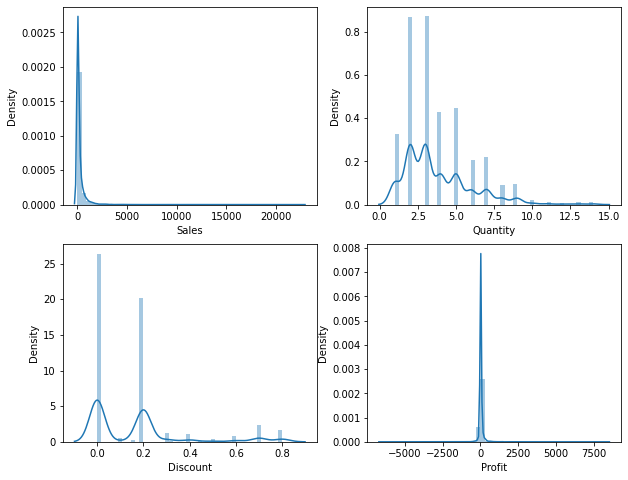

In [14]:
# Understanding the distribution of numerical data in the dataset
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.distplot(db['Sales'])
plt.subplot(222)
sns.distplot(db['Quantity'])
plt.subplot(223)
sns.distplot(db['Discount'])
plt.subplot(224)
sns.distplot(db['Profit'])

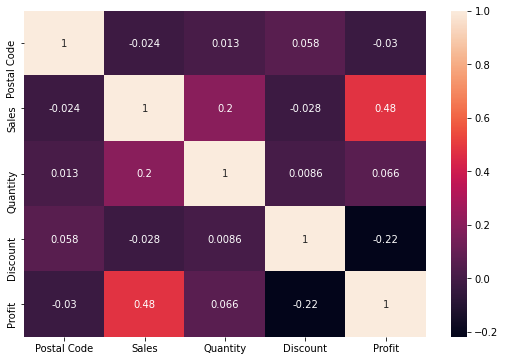

In [15]:
# plt.rcParams['figure.figsize'] = (9.0, 7.0)
plt.figure(figsize=(9,6))
sns.heatmap(db.corr(), annot=True)

The maximum positive correlation is between the Sales and Profit. We also have high negative correlation between Discount and Profit.

# Exploratory data analysis

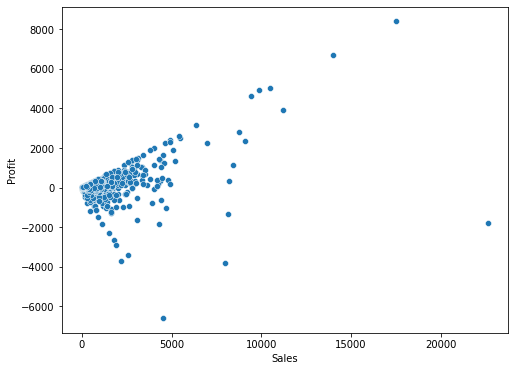

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=db, x="Sales", y="Profit")

As the Sales is increasing the profit is also increasing which is a good sign. But there is a region where we are having loss as well.

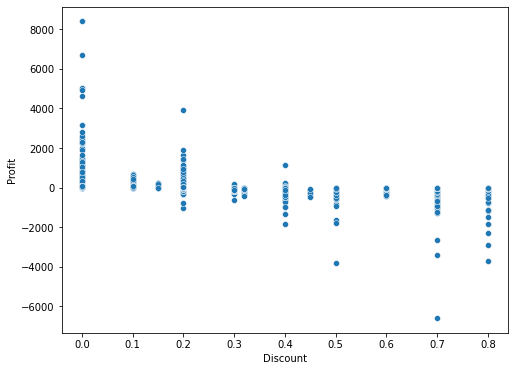

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=db, x="Discount", y="Profit")

Increasing discount is leading to loss. We can observe that anything more than 40% discount is leading to loss. We can take this in cosideration while providing discount to the products.

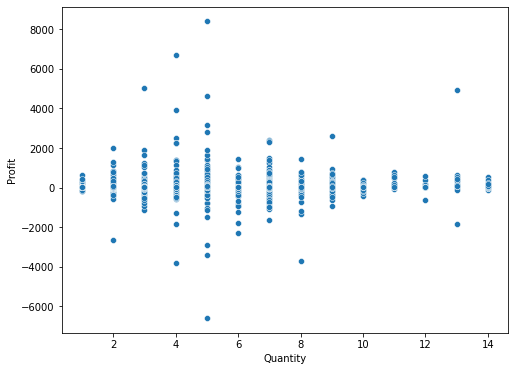

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=db, x="Quantity", y="Profit")

This becomes important to understand that while selling what quantity of product we are facing highest profit or loss.

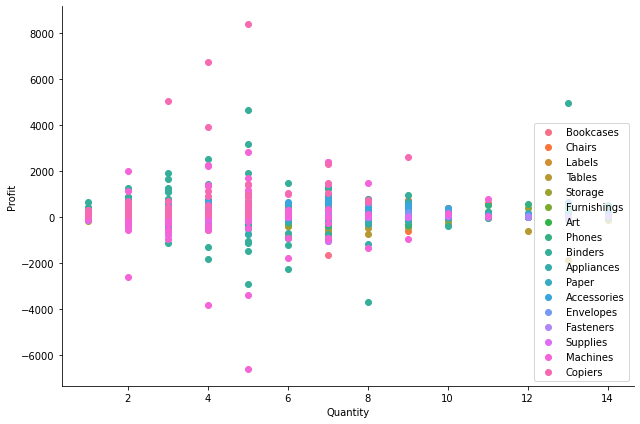

In [19]:
sns.FacetGrid(db, hue ="Sub-Category",height = 6, aspect=1.5).map(plt.scatter,'Quantity','Profit')
plt.legend()

### Sales and profit

In [20]:
#Create combo chart function to visualise profit with the quantity sold
def combo_chart(col_name):
  ax1 = sns.barplot(x=col_name, y='Profit', data = db, palette="Blues", ci=None)
  ax2 = ax1.twinx()     #specify we want to share the same x-axis
  sns.lineplot(x=col_name, y='Sales', data = db, sort=False, ci = None, linewidth = 3, color = 'brown')  #line plot creation  

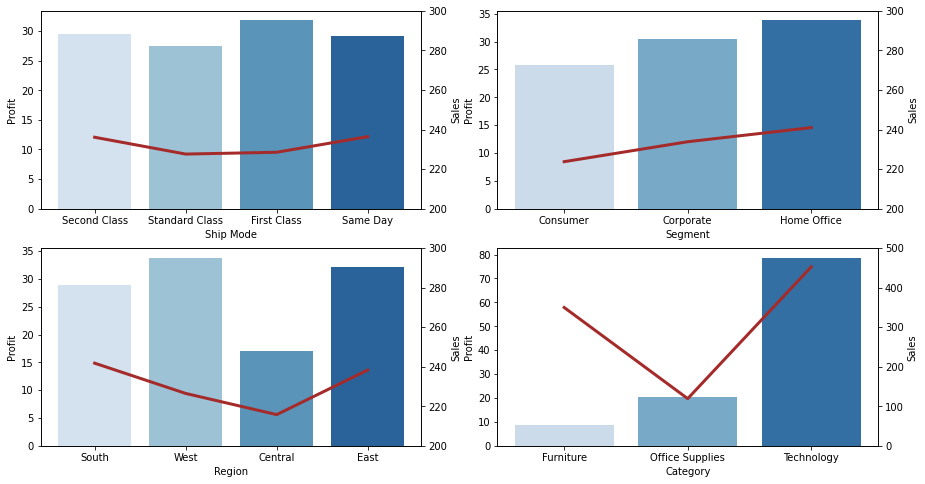

In [21]:
plt.figure(figsize=(15,8))

cat_cols = ['Ship Mode', 'Segment', 'Region', 'Category']
i=0
for cols in cat_cols:
  i+=1
  plt.subplot(2,2,i)
  combo_chart(cols)
  if i==4:
    plt.ylim([0, 500])  
  else:
    plt.ylim([200, 300])

As we can observe that at a lot of section we are getting good profit in comparision to comparitively less amount of sales. While there are sections were we are earning very less profits in comparision to the sales which we do.

(0.0, 1000.0)

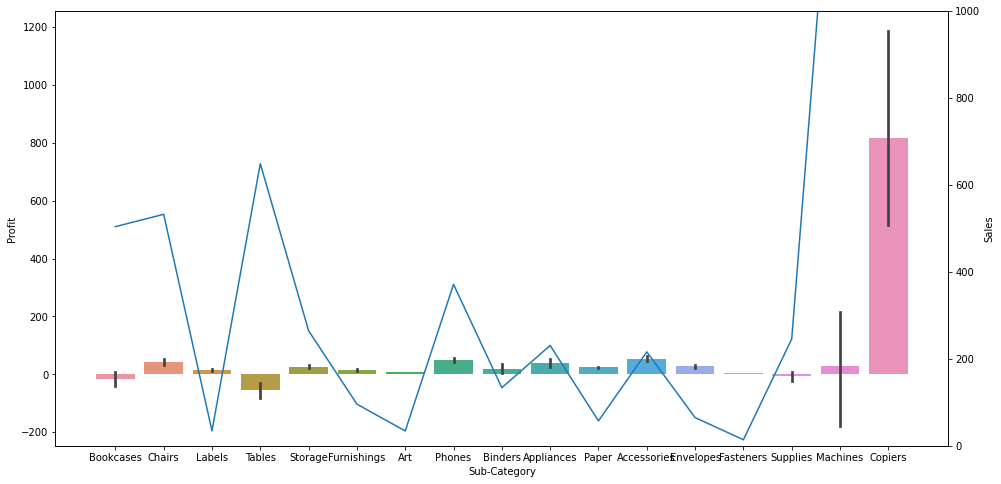

In [22]:
plt.figure(figsize=(16,8))
ax1 = sns.barplot(x=db['Sub-Category'], y=db['Profit'])
ax2 = ax1.twinx()
sns.lineplot(x=db['Sub-Category'], y=db['Sales'], ci=None)
plt.ylim([0,1000])

Through this visualization we can say that the focus could be on the products providing greater profit. Some of examples are Copier, Accessories, Phones, etc.
While products like tables and bookcases need to considered seriously as they are in loss.

This gives us complete evidence that even though the sales of Tables are comparitively high though we are having maximum loss. Similar with the Bookcases.

## Total Profit vs different available categories 

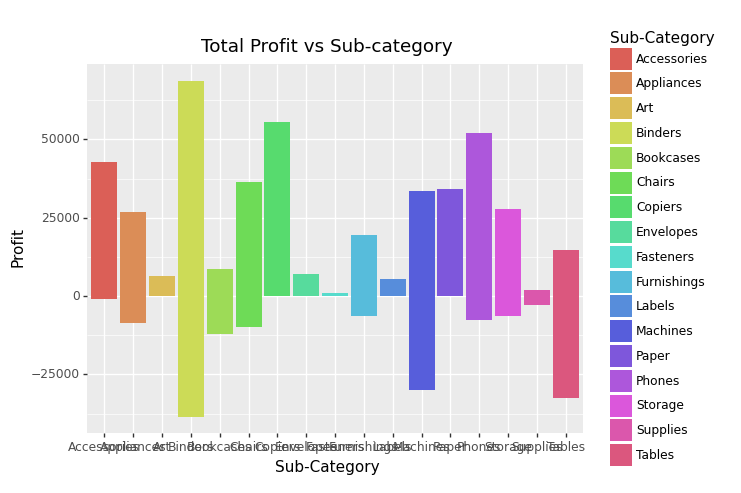

<ggplot: (8740126481181)>

In [27]:
Profit_plot = (ggplot(db, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + ggtitle('Total Profit vs Sub-category') ) 
display(Profit_plot)

Here, we can see the total profit of each sub-category. Copiers does not have any loss. While there are many other sub-categories where the loss is negligible. 

We need to work on the selling details of binders, machines and tables where loss is ver significant in comparison to the sales.

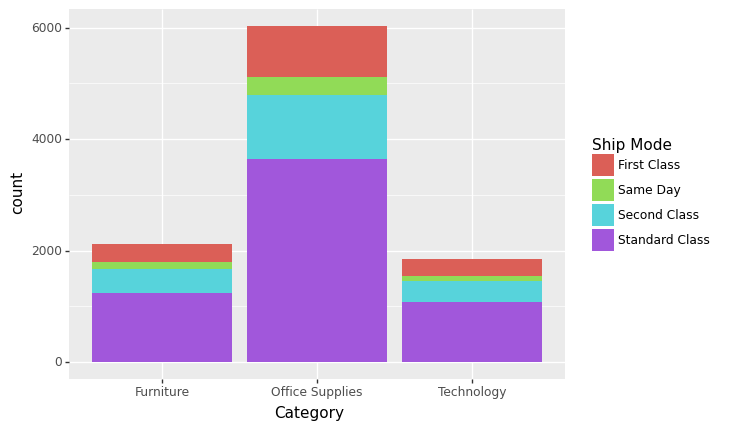

<ggplot: (8740126452789)>

In [28]:
ggplot(db, aes(x='Category', fill = 'Ship Mode')) + geom_bar(stat = 'count')

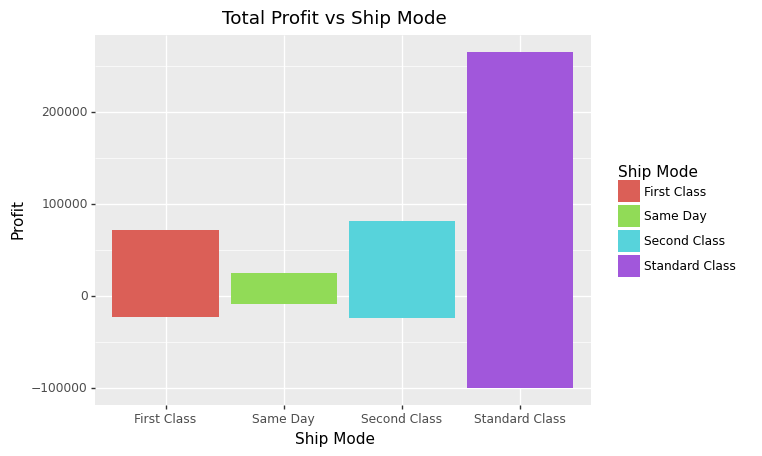

<ggplot: (8740126392249)>

In [29]:
Profit_plot = (ggplot(db, aes(x='Ship Mode', y='Profit', fill='Ship Mode')) + geom_col() + ggtitle('Total Profit vs Ship Mode') ) 
display(Profit_plot)

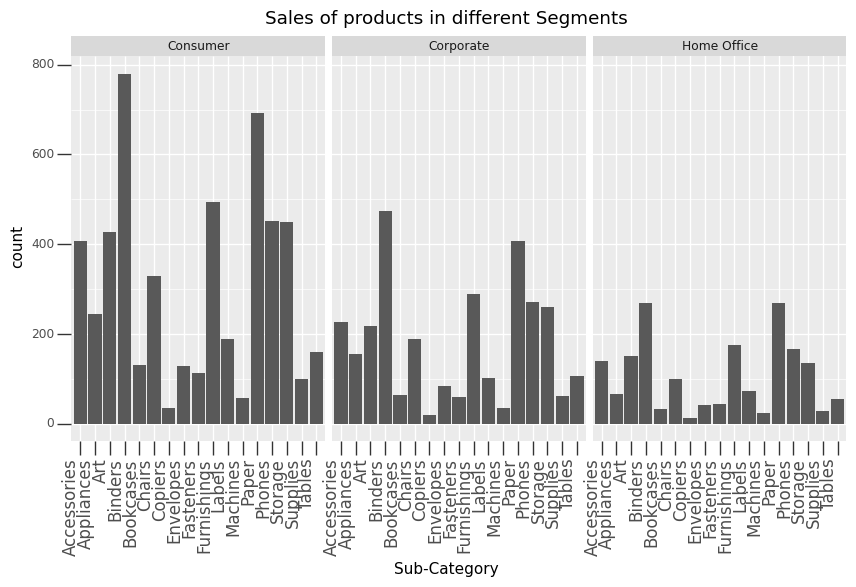

<ggplot: (8740126351597)>

In [30]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5), axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(db, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales of products in different Segments"))

From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that "Tables", "Supplies", "Machines", "Copiers", "Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

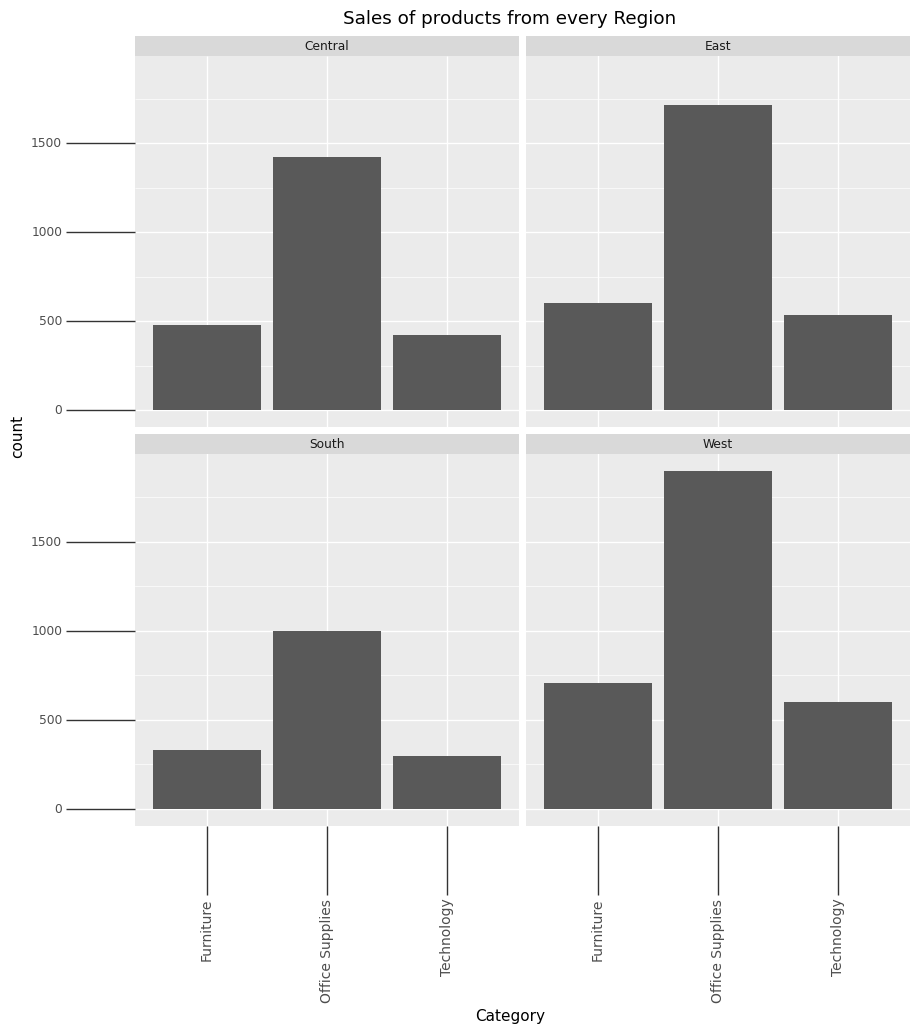

<ggplot: (8740136225377)>

In [31]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10), axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(db, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales of products from every Region"))

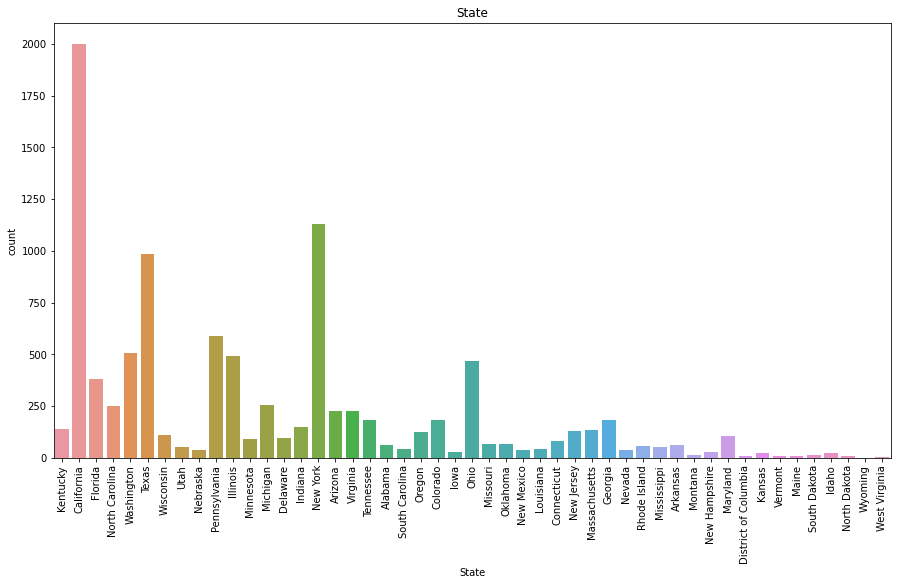

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x=db['State'])
plt.xticks(rotation=90)
plt.title("State")
plt.show()

In [33]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = db.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

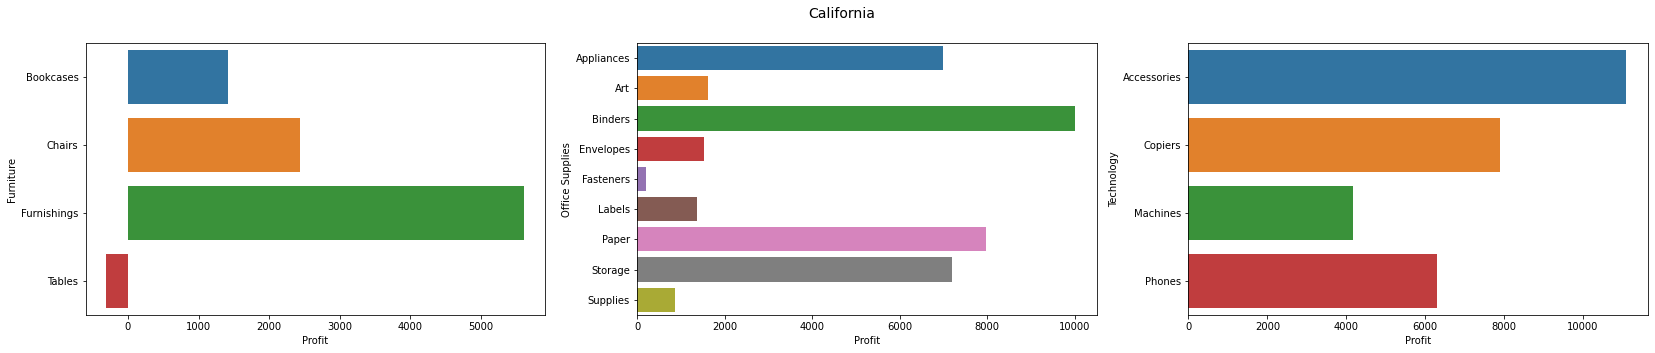

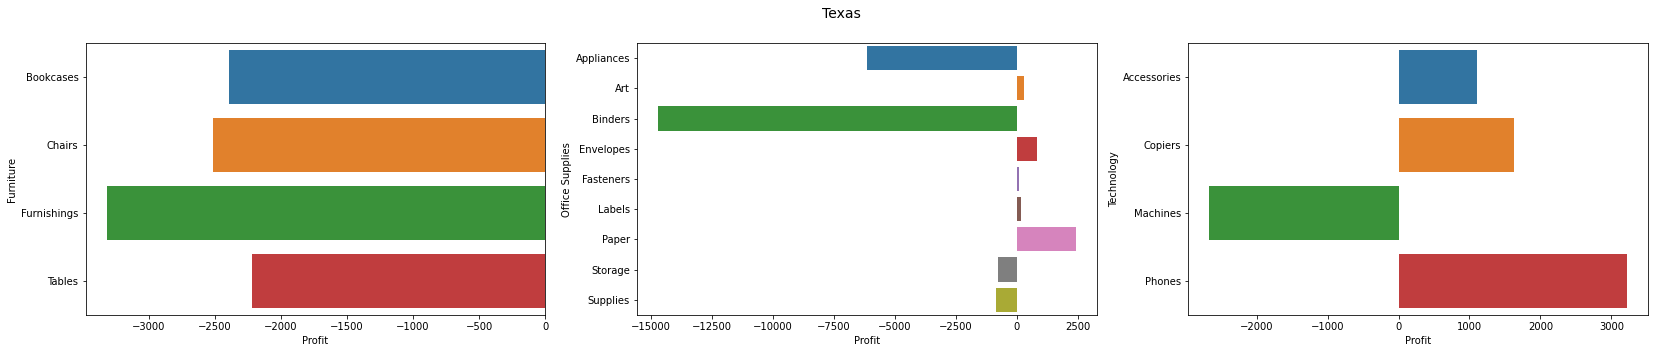

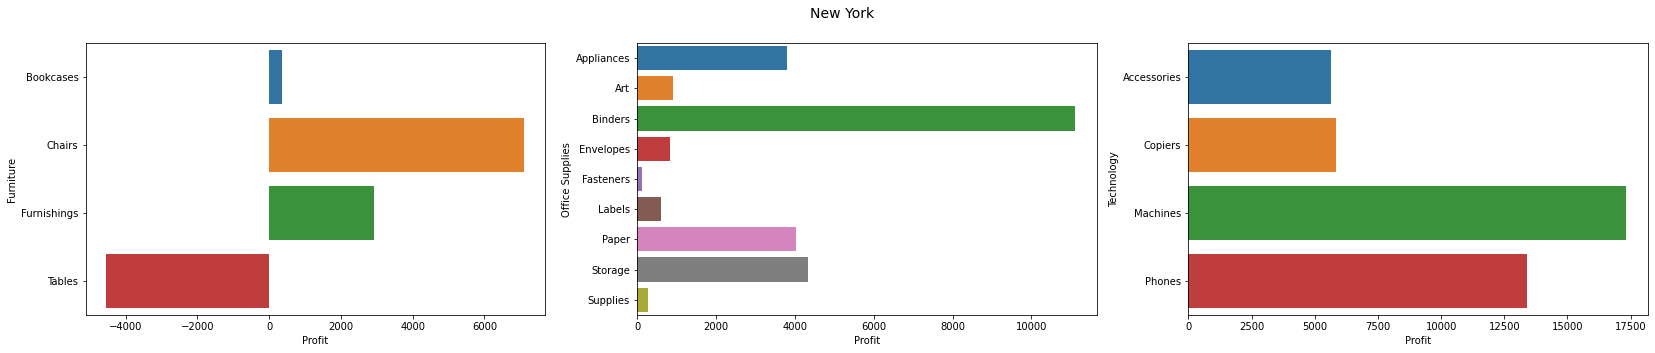

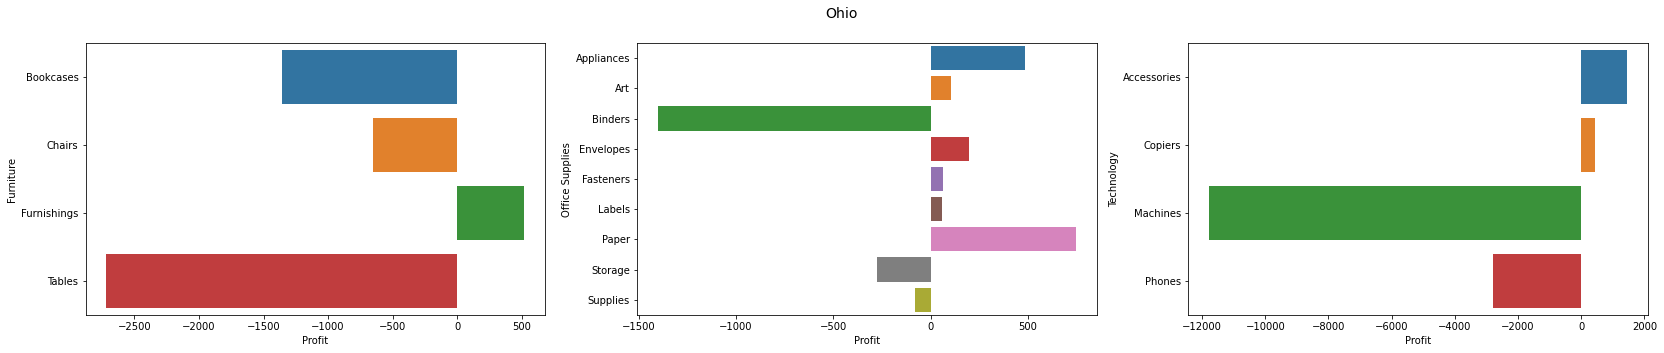

In [34]:
states = ['California', 'Texas', 'New York', 'Ohio']
state_data_viewer(states)

Through the above Visualizations we learned that in Which states and in which Category Sales and profits are high or low. We can improve in those sections to get more profit. One of the way can be by changing the price structure of that particular product.  